# Classifying images of Medicinal Plants


In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import random_split
from sklearn.metrics import confusion_matrix
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch.nn as nn

In [5]:
print (torch.__version__)
print(torchvision.__version__)

2.5.1+cpu
0.20.1+cpu


# Set Seaborn style.

In [6]:
%matplotlib inline
sns.set_style('darkgrid')

# Define Dataset.

In [17]:
data_dir ='Dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/Train')
print(classes)

['Test', 'Train']
['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']


In [18]:
Arive_Dantu_files = os.listdir(data_dir + "/Train/Arive-Dantu")
print('No. of training examples for Arive-Dantu:', len(Arive_Dantu_files))
print(Arive_Dantu_files[:5])

No. of training examples for Arive-Dantu: 350
['__0_1104004.png', '__0_3080947.png', '__0_4975985.png', '__0_9389335.png', '__10_2494719.png']


In [19]:
Basale_files = os.listdir(data_dir + "/Train/Basale")
print("No. of Training examples for Basale:", len(Basale_files))
print(Basale_files[:5])

No. of Training examples for Basale: 350
['__0_1233504.png', '__0_1282769.png', '__0_4515617.png', '__0_5371053.png', '__0_9584216.png']


In [20]:
Betel_files = os.listdir(data_dir + "/Train/Betel")
print("No. of training examples for Betel:", len(Betel_files))
print(Betel_files[:5])

No. of training examples for Betel: 336
['__0_1506402.png', '__0_2353287.png', '__0_2529593.png', '__0_3089470.png', '__0_3360397.png']


In [21]:
Crape_Jasmine_files = os.listdir(data_dir + "/Train/Crape_Jasmine")
print("No. of training examples for Crape_Jasmine:", len(Crape_Jasmine_files))
print(Crape_Jasmine_files[:5])

No. of training examples for Crape_Jasmine: 350
['__0_250804.png', '__0_4587016.png', '__0_5045001.png', '__0_5155284.png', '__0_7818576.png']


In [22]:
Curry_files = os.listdir(data_dir + "/Train/Curry")
print("No. of training examples for curry:", len(Curry_files))
print(Curry_files[:5])

No. of training examples for curry: 350
['__0_1162427.png', '__0_1194358.png', '__0_2717889.png', '__0_5367444.png', '__0_5468055.png']


In [23]:
Drumstick_files = os.listdir(data_dir + "/Train/Drumstick")
print("No. of training examples for Drumstick:", len(Drumstick_files))
print(Drumstick_files[:5])

No. of training examples for Drumstick: 350
['__0_2796965.png', '__0_3288211.png', '__0_4765686.png', '__0_6730346.png', '__0_8915082.png']


In [24]:
Fenugreek_files = os.listdir(data_dir + "/Train/Fenugreek")
print("No. of training examples for Fenugreek:", len(Fenugreek_files))
print(Fenugreek_files[:5])

No. of training examples for Fenugreek: 252
['__0_2716278.png', '__0_4440272.png', '__0_4514644.png', '__0_4919203.png', '__0_5593011.png']


In [25]:
Guava_files = os.listdir(data_dir + "/Train/Guava")
print("No. of training examples for Guava:", len(Guava_files))
print(Guava_files[:5])

No. of training examples for Guava: 350
['__0_1098137.png', '__0_2793355.png', '__0_3172369.png', '__0_5506792.png', '__0_8423178.png']


In [26]:
Hibiscus_files = os.listdir(data_dir + "/Train/Hibiscus")
print("No. of training examples for Hibiscus:", len(Hibiscus_files))
print(Hibiscus_files[:5])

No. of training examples for Hibiscus: 301
['__0_1504826.png', '__0_2016430.png', '__0_2128002.png', '__0_2366154.png', '__0_3372444.png']


In [27]:
Indian_Beech_files = os.listdir(data_dir + "/Train/Indian_Beech")
print("No. of training examples for Indian_Beech:", len(Indian_Beech_files))
print(Indian_Beech_files[:5])

No. of training examples for Indian_Beech: 350
['__0_1055772.png', '__0_2146499.png', '__0_2280361.png', '__0_2403467.png', '__0_4195164.png']


In [28]:
Indian_Mustard_files = os.listdir(data_dir + "/Train/Indian_Mustard")
print("No. of training examples forIndian_Mustard:", len(Indian_Mustard_files))
print(Indian_Mustard_files[:5])

No. of training examples forIndian_Mustard: 238
['__0_2295437.png', '__0_2985929.png', '__0_3846517.png', '__0_3918345.png', '__0_4211650.png']


In [29]:
Jackfruit_files = os.listdir(data_dir + "/Train/Jackfruit")
print("No. of training examples for Jackfruit:", len(Jackfruit_files))
print(Jackfruit_files[:5])

No. of training examples for Jackfruit: 350
['__0_121178.png', '__0_3297760.png', '__0_3979041.png', '__0_399419.png', '__0_4761396.png']


In [30]:
Jamaica_Cherry_Gasagase_files = os.listdir(data_dir + "/Train/Jamaica_Cherry-Gasagase")
print("No. of training examples for Jamaica_Cherry_Gasagase:", len(Jamaica_Cherry_Gasagase_files))
print(Jamaica_Cherry_Gasagase_files[:5])

No. of training examples for Jamaica_Cherry_Gasagase: 350
['__0_1644036.png', '__0_1834314.png', '__0_394910.png', '__0_4666067.png', '__0_6697733.png']


In [31]:
Jamun_files = os.listdir(data_dir + "/Train/Jamun")
print("No. of training examples for Jamun:", len(Jamun_files))
print(Jamun_files[:5])

No. of training examples for Jamun: 273
['__0_1569092.png', '__0_1640013.png', '__0_2040378.png', '__0_4911116.png', '__0_4944821.png']


In [32]:
Jasmine_files = os.listdir(data_dir + "/Train/Jasmine")
print("No. of training examples for Jasmine:", len(Jasmine_files))
print(Jasmine_files[:5])

No. of training examples for Jasmine: 350
['__0_5550631.png', '__0_5577272.png', '__0_5673716.png', '__0_6503786.png', '__0_7656681.png']


In [33]:
Karanda_files = os.listdir(data_dir + "/Train/Karanda")
print("No. of training examples for Karanda:", len(Karanda_files))
print(Karanda_files[:5])

No. of training examples for Karanda: 350
['__0_2200416.png', '__0_2872209.png', '__0_452835.png', '__0_5626888.png', '__0_5733941.png']


In [34]:
Lemon_files = os.listdir(data_dir + "/Train/Lemon")
print("No. of training examples for Lemon:", len(Lemon_files))
print(Lemon_files[:5])

No. of training examples for Lemon: 350
['__0_1413818.png', '__0_2194264.png', '__0_2643366.png', '__0_4432348.png', '__0_4494165.png']


In [35]:
Mango_files = os.listdir(data_dir + "/Train/Mango")
print("No. of training examples for Mango:", len(Mango_files))
print(Mango_files[:5])

No. of training examples for Mango: 350
['__0_1388070.png', '__0_1695278.png', '__0_2982926.png', '__0_4334891.png', '__0_6686991.png']


In [36]:
Mexican_Mint_files = os.listdir(data_dir + "/Train/Mexican_Mint")
print("No. of training examples for Mexican_Mint:", len(Mexican_Mint_files))
print(Mexican_Mint_files[:5])

No. of training examples for Mexican_Mint: 336
['__0_1033768.png', '__0_1477142.png', '__0_2584544.png', '__0_3040238.png', '__0_5195004.png']


In [37]:
Mint_files = os.listdir(data_dir + "/Train/Mint")
print("No. of training examples for Mint:", len(Mint_files))
print(Mint_files[:5])

No. of training examples for Mint: 350
['__0_2160734.png', '__0_2979262.png', '__0_3412043.png', '__0_7371383.png', '__0_8087845.png']


In [38]:
Neem_files = os.listdir(data_dir + "/Train/Neem")
print("No. of training examples for Neem:", len(Neem_files))
print(Neem_files[:5])

No. of training examples for Neem: 350
['__0_2992310.png', '__0_3722466.png', '__0_4217860.png', '__0_5318927.png', '__0_5716061.png']


In [39]:
Oleander_files = os.listdir(data_dir + "/Train/Oleander")
print("No. of training examples for Oleander:", len(Oleander_files))
print(Oleander_files[:5])

No. of training examples for Oleander: 350
['__0_1247629.png', '__0_2926501.png', '__0_5456318.png', '__0_594159.png', '__0_6091830.png']


In [40]:
Parijata_files = os.listdir(data_dir + "/Train/Parijata")
print("No. of training examples for Parijata:", len(Parijata_files))
print(Parijata_files[:5])

No. of training examples for Parijata: 280
['__0_1007185.png', '__0_1562460.png', '__0_2083956.png', '__0_2408395.png', '__0_3197278.png']


In [41]:
Peepal_files = os.listdir(data_dir + "/Train/Peepal")
print("No. of training examples for Peepal:", len(Peepal_files))
print(Peepal_files[:5])

No. of training examples for Peepal: 350
['__0_1022362.png', '__0_1076389.png', '__0_1806419.png', '__0_4618223.png', '__0_4956331.png']


In [42]:
Pomegranate_files = os.listdir(data_dir + "/Train/Pomegranate")
print("No. of training examples for Pomegranate:", len(Pomegranate_files))
print(Pomegranate_files[:5])

No. of training examples for Pomegranate: 350
['__0_2049055.png', '__0_3450461.png', '__0_4123748.png', '__0_4505884.png', '__0_6983971.png']


In [43]:
Rasna_files = os.listdir(data_dir + "/Train/Rasna")
print("No. of training examples for Rasna:", len(Rasna_files))
print(Rasna_files[:5])

No. of training examples for Rasna: 350
['__0_1321647.png', '__0_1515256.png', '__0_4342405.png', '__0_5862217.png', '__0_6661793.png']


In [44]:
Rose_apple_files = os.listdir(data_dir + "/Train/Rose_apple")
print("No. of training examples for Rose_apple:", len(Rose_apple_files))
print(Rose_apple_files[:5])

No. of training examples for Rose_apple: 350
['__0_1139562.png', '__0_1827048.png', '__0_2358396.png', '__0_2893149.png', '__0_3431684.png']


In [45]:
Roxburgh_fig_files = os.listdir(data_dir + "/Train/Roxburgh_fig")
print("No. of training examples for Roxburgh_fig:", len(Roxburgh_fig_files))
print(Roxburgh_fig_files[:5])

No. of training examples for Roxburgh_fig: 350
['__0_2291699.png', '__0_2877799.png', '__0_396853.png', '__0_5380992.png', '__0_6098947.png']


In [46]:
Sandalwood_files = os.listdir(data_dir + "/Train/Sandalwood")
print("No. of training examples for Sandalwood:", len(Sandalwood_files))
print(Sandalwood_files[:5])

No. of training examples for Sandalwood: 350
['__0_1556219.png', '__0_213600.png', '__0_3041203.png', '__0_5232438.png', '__0_6300031.png']


In [47]:
Tulsi_files = os.listdir(data_dir + "/Train/Tulsi")
print("No. of training examples for Tulsi:", len(Tulsi_files))
print(Tulsi_files[:5])

No. of training examples for Tulsi: 350
['__0_3227415.png', '__0_3685474.png', '__0_4064179.png', '__0_5074482.png', '__0_5283665.png']


# Creating training set

In [48]:
img_size = 400
train_dataset = ImageFolder(data_dir+'/Train', transform=tt.Compose
                      ([tt.ToTensor(),
                        tt.Resize((400,400)),
                        tt.RandomHorizontalFlip(),
                        tt.Pad(8, padding_mode='reflect'),
                        tt.RandomCrop(img_size),
                        tt.Normalize(mean=(0.5), std=(0.5))
                       ]
                      ))

# Exploring data set

In [49]:
len(train_dataset)

10066

In [50]:
train_dataset.classes

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

# The list of classes is stored in the `.classes` property of the dataset.


In [51]:
train_dataset.class_to_idx

{'Arive-Dantu': 0,
 'Basale': 1,
 'Betel': 2,
 'Crape_Jasmine': 3,
 'Curry': 4,
 'Drumstick': 5,
 'Fenugreek': 6,
 'Guava': 7,
 'Hibiscus': 8,
 'Indian_Beech': 9,
 'Indian_Mustard': 10,
 'Jackfruit': 11,
 'Jamaica_Cherry-Gasagase': 12,
 'Jamun': 13,
 'Jasmine': 14,
 'Karanda': 15,
 'Lemon': 16,
 'Mango': 17,
 'Mexican_Mint': 18,
 'Mint': 19,
 'Neem': 20,
 'Oleander': 21,
 'Parijata': 22,
 'Peepal': 23,
 'Pomegranate': 24,
 'Rasna': 25,
 'Rose_apple': 26,
 'Roxburgh_fig': 27,
 'Sandalwood': 28,
 'Tulsi': 29}

In [52]:
sample=next(iter(train_dataset))
len(sample)

2

In [53]:
image,label=sample
print("Image Shape:",image.shape)
print("Label Shape:",torch.tensor(label).shape)

Image Shape: torch.Size([3, 400, 400])
Label Shape: torch.Size([])


In [54]:
image.squeeze().shape

torch.Size([3, 400, 400])

# Calculating mean and std

In [55]:
mean = torch.tensor([0.5, 0.5, 0.5])
std = torch.tensor([0.5, 0.5, 0.5])

# Shape and Label of random samples

In [56]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 400, 400]) 0


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [57]:
img, label = train_dataset[120]
print(img.shape, label)
torch.min(img), torch.max(img)

torch.Size([3, 400, 400]) 0


(tensor(-1.), tensor(1.))

# View random samples

In [60]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [61]:
def show_example(img, label, mean, std):
    img = img.permute(1, 2, 0)
    img = img * std + mean  # Denormalize
    img = img.clamp(0, 1)  # Clamp values to the range [0, 1]
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img)
    plt.show()

Label:  Arive-Dantu (0)


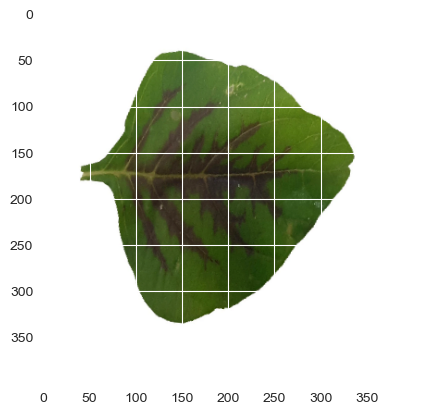

In [62]:

show_example(*train_dataset[100], mean, std)

Label:  Basale (1)


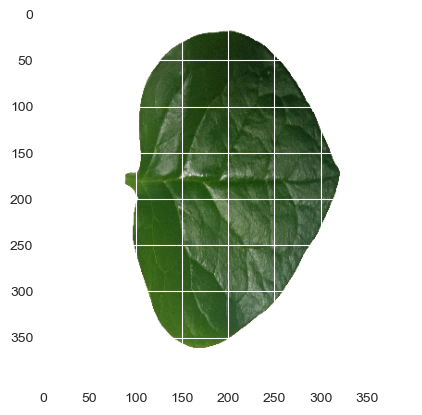

In [63]:
show_example(*train_dataset[523], mean, std)

Label:  Betel (2)


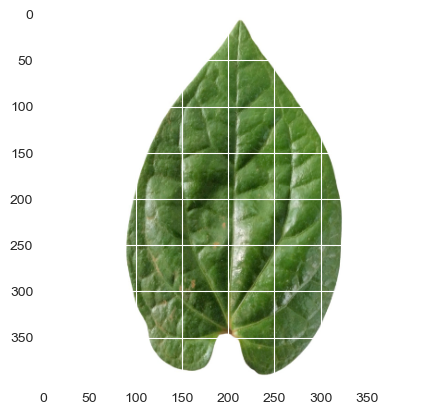

In [64]:
show_example(*train_dataset[1023], mean, std)

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (20 percent) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

# Get Train and Validation Samples

In [65]:
random_seed = 42
torch.manual_seed(random_seed);

In [66]:
val_size = int(0.2*len(train_dataset))
train_size = len(train_dataset) - val_size

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(8053, 2013)

We can now create data loaders for training and validation, to load the data in batches

In [67]:
from torch.utils.data.dataloader import DataLoader
batch_size=50

In [68]:
train_dl= DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

# Denormalized Images

In [69]:
def denormalize(image, means, stds):
  means = means.clone().detach().reshape(1, 3, 1, 1)
  stds = stds.clone().detach().reshape(1, 3, 1, 1)
  return image * stds + means

In [70]:
from torchvision.utils import make_grid

def show_batch(dl, mean, std):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, mean, std)
        ax.imshow(make_grid(denorm_images[:64], nrow=10).permute(1, 2, 0).clamp(0,1))
        break

In [72]:
show_batch(train_dl, mean, std)

# Defining the Model (Convolutional Neural Network)

In [74]:
class ImprovedViT(nn.Module):
    def _init_(self, num_classes=30, image_size=400, patch_size=16, embed_dim=128, num_heads=8, depth=6):
        super(ImprovedViT, self)._init_()
        assert image_size % patch_size == 0, "Image size must be divisible by patch size"
        
        self.num_patches = (image_size // patch_size) ** 2
        self.patch_dim = 3 * patch_size * patch_size
        self.embed_dim = embed_dim
        
        # Patch embedding layer
        self.patch_embed = nn.Linear(self.patch_dim, embed_dim)
        
        # Positional encoding
        self.positional_encoding = nn.Parameter(torch.randn(1, self.num_patches, embed_dim))
        
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        
        # Classification head
        self.fc1 = nn.Linear(embed_dim, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Reshape input to patches
        batch_size = x.size(0)
        patches = x.unfold(2, 16, 16).unfold(3, 16, 16)  # Divide into 16x16 patches
        patches = patches.contiguous().view(batch_size, -1, 3 * 16 * 16)  # Flatten patches
        
        # Apply patch embedding
        x = self.patch_embed(patches)  # Shape: [batch_size, num_patches, embed_dim]
        
        # Add positional encoding
        x += self.positional_encoding
        
        # Pass through Transformer encoder
        x = self.transformer(x)
        
        # Take the mean of all patch embeddings as the image representation
        x = x.mean(dim=1)
        
        # Classification head
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiating the model
model = ImprovedViT()

In [75]:
import torch.optim as optim
import torch.nn.functional as F

In [76]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [79]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [80]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

ValueError: optimizer got an empty parameter list

# Train Function.

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
            total_predictions += labels.size(0)
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions.double() / total_predictions
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    print('Training complete')


# Validate Function.

In [ ]:
def validate_model(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
            total_predictions += labels.size(0)
    val_loss = running_loss / len(val_loader)
    val_accuracy = correct_predictions.double() / total_predictions
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}')
    return val_loss, val_accuracy

In [ ]:
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

Epoch 1/5, Loss: 1.4590, Accuracy: 0.5928
Epoch 2/5, Loss: 0.4748, Accuracy: 0.8539
Epoch 3/5, Loss: 0.2411, Accuracy: 0.9252
Epoch 4/5, Loss: 0.1579, Accuracy: 0.9490
Epoch 5/5, Loss: 0.1141, Accuracy: 0.9647
Training complete


In [ ]:
validate_model(model, val_loader, criterion)

Validation Loss: 0.2367, Accuracy: 0.9285


(0.23668969041180044, tensor(0.9285, dtype=torch.float64))

# Prediction Function.

In [ ]:
def get_predictions(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Get predictions on the validation set

In [ ]:
val_labels, val_preds = get_predictions(model, val_loader)

# Create a DataFrame to show predictions and actual labels

In [ ]:
results = pd.DataFrame({'Actual': val_labels, 'Predicted': val_preds})
results['Correct'] = results['Actual'] == results['Predicted']

# Show a table of correct and incorrect predictions

In [ ]:
print(results.value_counts('Correct'))

Correct
True     1881
False     133
Name: count, dtype: int64


In [ ]:
def get_predictions_with_indices(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

In [ ]:
def show_image_with_label(dataset, index, class_names, val_preds):
    image, label = dataset[index]
    image = image.permute(1, 2, 0).numpy()  # Rearrange dimensions and convert to numpy array
    image = (image - image.min()) / (image.max() - image.min())  # Normalize the image to [0, 1] range
    plt.imshow(image)

    # Print debug information
    print(f"Index: {index}")
    print(f"Actual label index: {label}")
    print(f"Predicted label index: {val_preds[index]}")
    print(f"Class names length: {len(class_names)}")

    # Ensure indices are within range
    if label < len(class_names) and val_preds[index] < len(class_names):
        plt.title(f'Actual: {class_names[label]}, Predicted: {class_names[val_preds[index]]}')
    else:
        plt.title(f'Actual: {label}, Predicted: {val_preds[index]} (Index out of range)')
    plt.show()

In [ ]:
# Define class names (adjust as necessary for your specific dataset)
class_names = classes

Index: 500
Actual label index: 5
Predicted label index: 5
Class names length: 30


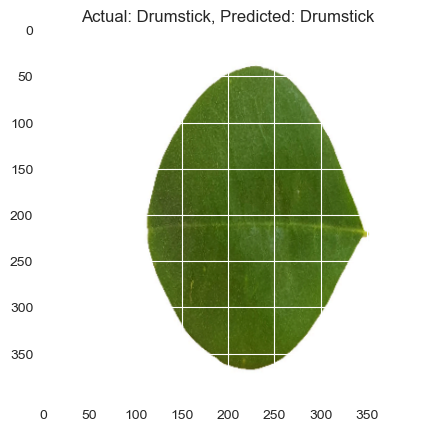

In [ ]:
show_image_with_label(val_dataset, 500, class_names, val_preds)

Index: 1270
Actual label index: 7
Predicted label index: 7
Class names length: 30


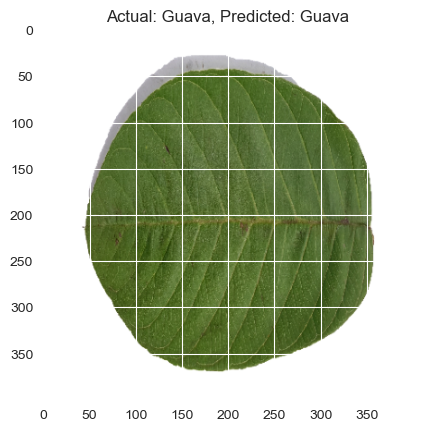

In [ ]:
show_image_with_label(val_dataset, 1270, class_names, val_preds)

# Checking if all indices are within range

In [ ]:
print(f"Validation Labels: {val_labels[:10]}")
print(f"Validation Predictions: {val_preds[:10]}")

print(f"Max val_labels index: {max(val_labels)}")
print(f"Max val_preds index: {max(val_preds)}")
print(f"Class names length: {len(class_names)}")

Validation Labels: [22, 19, 1, 27, 26, 4, 14, 2, 4, 16]
Validation Predictions: [15, 19, 1, 27, 26, 4, 14, 2, 4, 18]
Max val_labels index: 29
Max val_preds index: 29
Class names length: 30


In [ ]:
def get_predictions_with_class_names(model, loader, class_names):
    all_labels, all_preds = get_predictions_with_indices(model, loader)
    return [class_names[label] for label in all_labels], [class_names[pred] for pred in all_preds]

# Get predictions on the validation set with class names

In [ ]:
val_labels, val_preds = get_predictions_with_class_names(model, val_loader, class_names)

# Create a DataFrame to show predictions and actual class names

In [ ]:
results = pd.DataFrame({'Actual': val_labels, 'Predicted': val_preds})
results['Correct'] = results['Actual'] == results['Predicted']

# Show a table of correct and incorrect predictions

In [ ]:
print(results.value_counts('Correct'))

Correct
True     1885
False     129
Name: count, dtype: int64


# Show an example image from the validation set with class names

Index: 600
Actual label index: 26
Predicted label index: 26
Class names length: 30


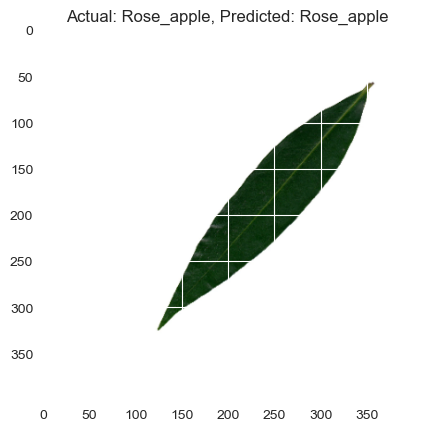

In [ ]:
val_indices, val_indices_preds = get_predictions_with_indices(model, val_loader)
show_image_with_label(val_dataset, 600, class_names, val_indices_preds)

Index: 300
Actual label index: 18
Predicted label index: 18
Class names length: 30


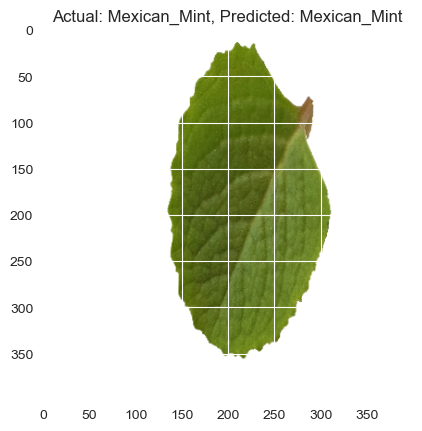

In [ ]:
show_image_with_label(val_dataset, 300, class_names, val_indices_preds)

Index: 999
Actual label index: 19
Predicted label index: 19
Class names length: 30


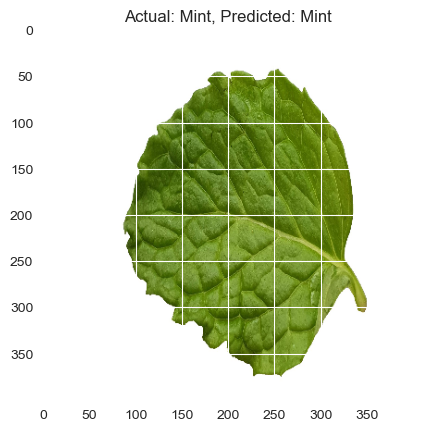

In [ ]:
show_image_with_label(val_dataset, 999, class_names, val_indices_preds)

# Confusion Matrix of Training and Validation

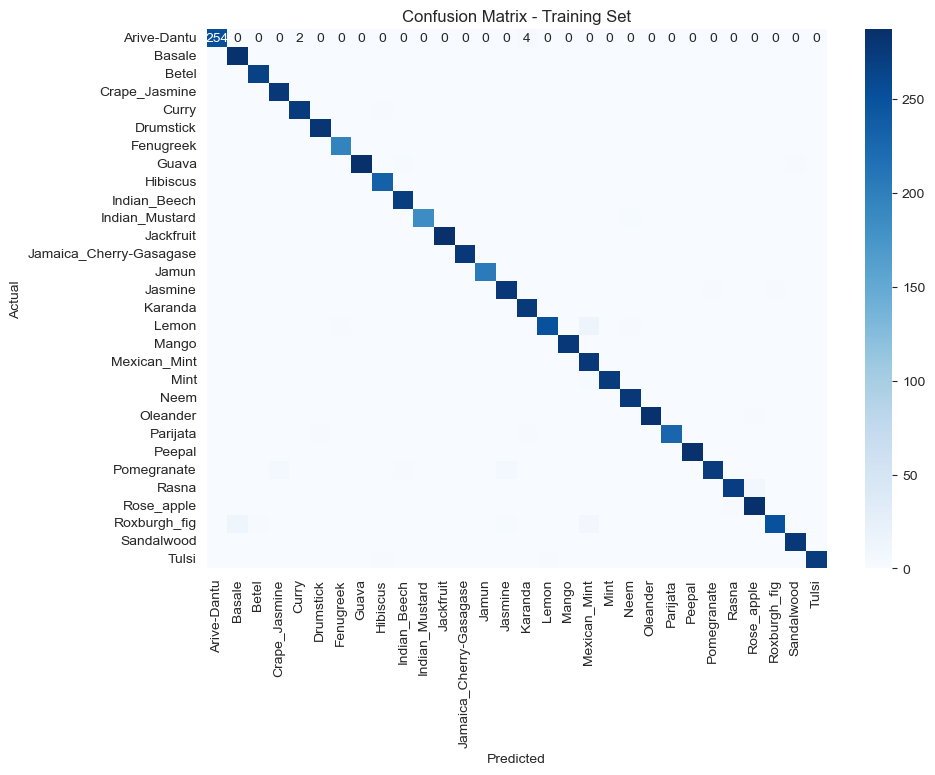

In [ ]:
train_labels, train_preds = get_predictions(model, train_loader)
conf_matrix_train = confusion_matrix(train_labels, train_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

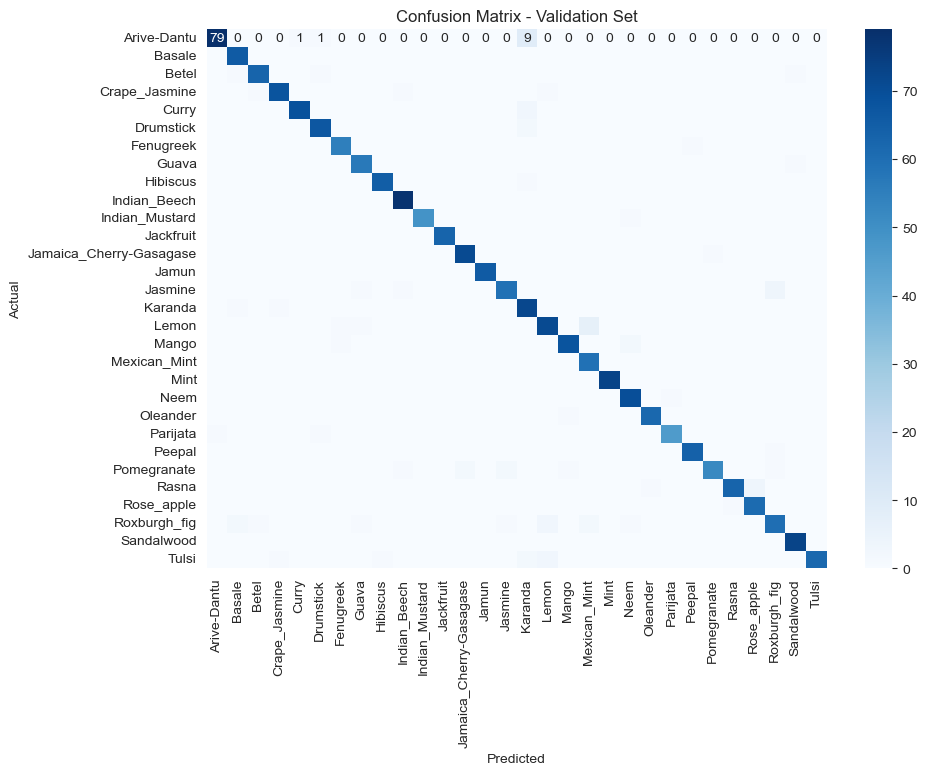

In [ ]:
val_labels, val_preds = get_predictions(model, val_loader)
conf_matrix_val = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Defining Test Dataset

In [ ]:
img_size = 400
test_dataset = ImageFolder(data_dir+'/Test', transform=tt.Compose
                      ([tt.ToTensor(),
                        tt.Resize((400,400)),
                        tt.RandomHorizontalFlip(),
                        #tt.RandomRotation(degrees=(-90, 90)),
                        tt.Pad(8, padding_mode='reflect'),
                        tt.RandomCrop(img_size),
                        #tt.Normalize(mean=(0.5157), std=(0.2546))
                        tt.Normalize(mean=(0.5), std=(0.5))
                       ]
                      ))

In [ ]:
len(test_dataset)

4314

In [ ]:
test_dataset.class_to_idx

{'Arive-Dantu': 0,
 'Basale': 1,
 'Betel': 2,
 'Crape_Jasmine': 3,
 'Curry': 4,
 'Drumstick': 5,
 'Fenugreek': 6,
 'Guava': 7,
 'Hibiscus': 8,
 'Indian_Beech': 9,
 'Indian_Mustard': 10,
 'Jackfruit': 11,
 'Jamaica_Cherry-Gasagase': 12,
 'Jamun': 13,
 'Jasmine': 14,
 'Karanda': 15,
 'Lemon': 16,
 'Mango': 17,
 'Mexican_Mint': 18,
 'Mint': 19,
 'Neem': 20,
 'Oleander': 21,
 'Parijata': 22,
 'Peepal': 23,
 'Pomegranate': 24,
 'Rasna': 25,
 'Rose_apple': 26,
 'Roxburgh_fig': 27,
 'Sandalwood': 28,
 'Tulsi': 29}

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
test_labels, test_preds = get_predictions_with_class_names(model, test_loader, class_names)

# Create a DataFrame to show predictions and actual class names

In [ ]:
test_results = pd.DataFrame({'Actual': test_labels, 'Predicted': test_preds})
test_results['Correct'] = test_results['Actual'] == test_results['Predicted']

# Calculate Test Accuracy

In [ ]:
test_accuracy = test_results['Correct'].mean()
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7311


# Show a table of correct and incorrect predictions

In [ ]:
print(test_results.value_counts('Correct'))

Correct
True     3154
False    1160
Name: count, dtype: int64


# Show an example image from the Testing set with class names

Index: 180
Actual label index: 1
Predicted label index: 1
Class names length: 30


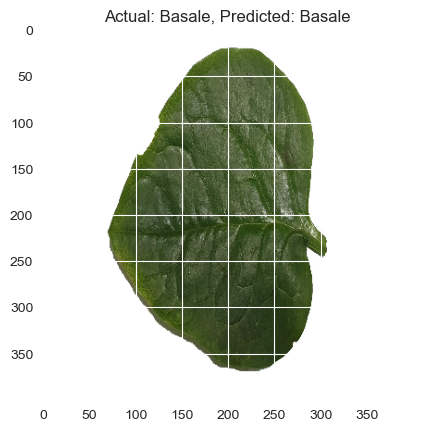

In [ ]:
show_image_with_label(test_dataset, 180, class_names, test_indices_preds)

Index: 411
Actual label index: 2
Predicted label index: 2
Class names length: 30


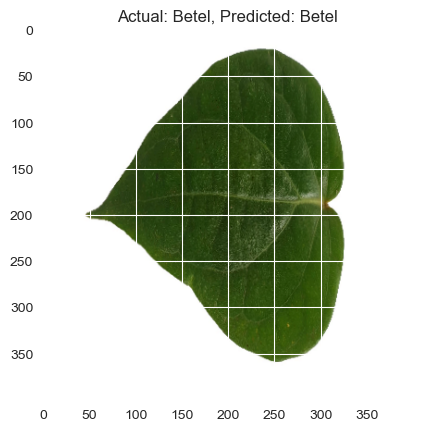

In [ ]:
show_image_with_label(test_dataset, 411, class_names, test_indices_preds)

# Confusion Matrix of Test Dataset

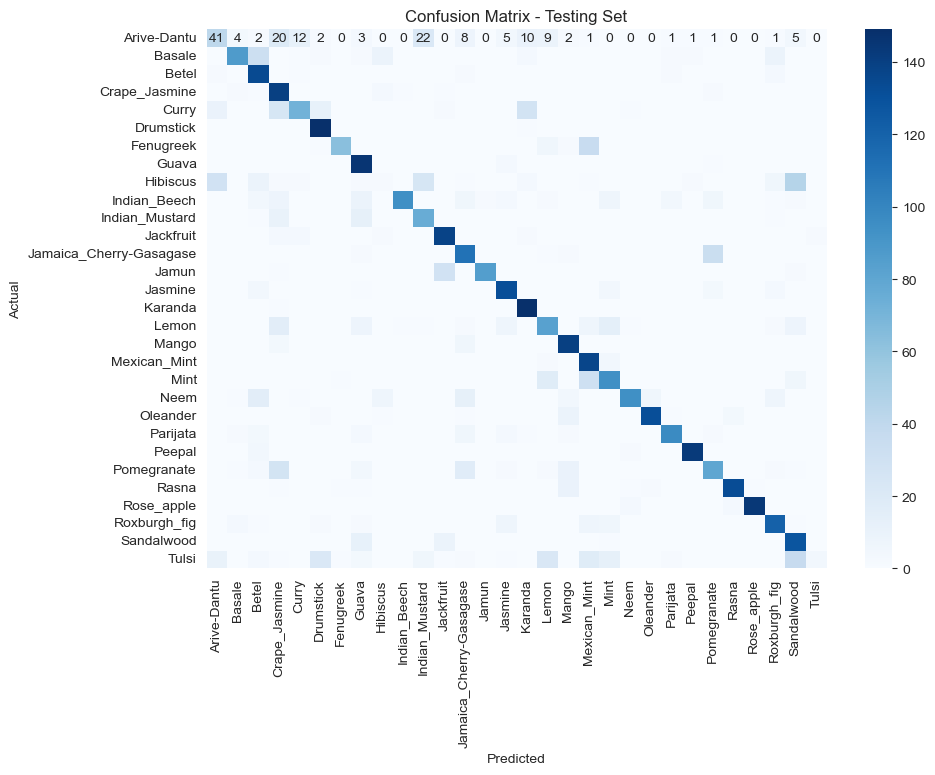

In [ ]:
test_labels, test_preds = get_predictions(model, test_loader)
conf_matrix_test = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

# Saving The Model

In [ ]:
torch.save(model.state_dict(), 'current_model.pth')